In [ ]:
from qibo.models import Circuit
from qibo import gates
import qibo
import numpy as np
import matplotlib.pyplot as plt
import time
qibo.__version__

In [ ]:
qibo.set_backend("qibolab")
# qibo.set_backend("numpy")

In [3]:
#allXY rotations
gatelist = [
            # [gates.I(0), gates.I(0)], 
            [gates.RX(0, np.pi), gates.RX(0, np.pi)],
            [gates.RY(0, np.pi), gates.RY(0, np.pi)],    
            [gates.RX(0, np.pi), gates.RY(0, np.pi)],        
            [gates.RY(0, np.pi), gates.RX(0, np.pi)],        
            [gates.RX(0, np.pi/2), gates.I(0)],        
            [gates.RY(0, np.pi/2), gates.I(0)],            
            [gates.RX(0, np.pi/2), gates.RY(0, np.pi/2)],            
            [gates.RX(0, np.pi/2), gates.RY(0, np.pi/2)],                
            [gates.RX(0, np.pi/2), gates.RY(0, np.pi)],                
            [gates.RY(0, np.pi/2), gates.RX(0, np.pi)],                
            [gates.RX(0, np.pi), gates.RY(0, np.pi/2)],                
            [gates.RY(0, np.pi), gates.RX(0, np.pi/2)],                
            [gates.RX(0, np.pi/2), gates.RX(0, np.pi)],                            
            [gates.RX(0, np.pi), gates.RX(0, np.pi/2)],                
            [gates.RY(0, np.pi/2), gates.RY(0, np.pi)],                
            [gates.RY(0, np.pi), gates.RY(0, np.pi/2)],                
            [gates.RX(0, np.pi), gates.I(0)],  
            [gates.RY(0, np.pi), gates.I(0)],                
            [gates.RX(0, np.pi/2), gates.RX(0, np.pi/2)],                
            [gates.RY(0, np.pi/2), gates.RY(0, np.pi/2)]                
           ]

In [ ]:
results = []
gateNumber = []
n = 0 
# wait_time= 0.0000109 * 3 #T1 x 2
for gate in gatelist:
    # time.sleep(wait_time)
    c = Circuit(1)
    c.add(gate)
    c.add(gates.M(0))
    print("Applaying gate pair number: " + str(n))
    #probabilitat resultant mesura qubit[#0] = [probabilitat de qubit a 0 , probabilitat qubit 1]
    prob = c(nshots=1024).probabilities([0])
    results.append(prob[0]-prob[1])
    gateNumber.append(n)
    n=n+1

#results contain Z projection of the probability of the qubit being 0 
print(results)

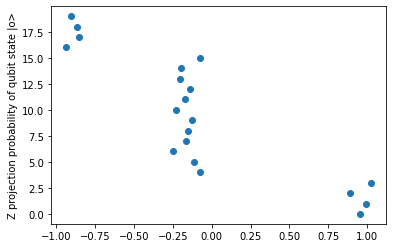

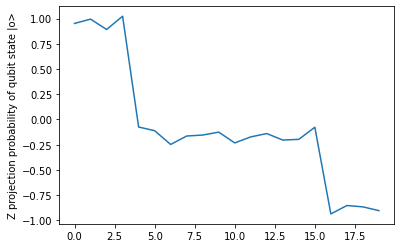

In [5]:
plt.scatter(results, gateNumber)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

plt.plot(results)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()